# Project 3 - Analyzing Student Performance ML Techniques


We will be using the [UCI ML Student Performance dataset](https://archive.ics.uci.edu/ml/datasets/Student+Performance). This dataset collects various attributes from two schools in Portugal and gathers student performance.

In [1]:
# YOUR CODE HERE
import numpy as np
from sklearn.linear_model import Lasso
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
import sklearn.metrics
import sys
import numpy
from numpy import *
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

numpy.set_printoptions(threshold=sys.maxsize)


pd.set_option("display.max_rows", 15, "display.max_columns", None)
df_mat = pd.read_csv('student-mat.csv', sep = ';')
df_por = pd.read_csv('student-por.csv', sep = ';')

In [2]:
df_mat

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [3]:
df_por

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10


As we can see, there are two datasets here. df_mat is the performance of these students in Math class while df_por is their performance in Portuguese class.

We can start cleaning our data by renaming the columns to be a lot more clear as to what they contain. We will also discard any columns that won't be of use in our exploratory data analysis.

In [4]:
df_por = df_por.rename(columns={"school":"School", "sex":"Sex", "age":"Age","address":"addressType","famsize":"famSize","Pstatus":"parentCohabitation", "Medu":"momEducation", "Fedu":"dadEducation", "Mjob":"momJob","Fjob":"dadJob","reason":"schoolReason","guardian":"Guardian","traveltime":"schoolCommuteTime","studytime":"wklyStudyTime","failures":"pastFailures","schoolsup":"schoolSupport","famsup":"familySupport","paid":"extraPaidClasses","activities":"extraActivities","nursery":"nurserySchool","higher":"pursueHigherEdu","internet":"internetAccess","romantic":"inRelationship","famrel":"familyRelQuality","freetime":"freeTime","goout":"outWithFriends","Dalc":"workdayAlcoholConsumption","Walc":"weekendAlcoholConsumption", "health":"healthStatus","absences":"schoolAbsences", "G1":"firstPeriodGrade", "G2":"secondPeriodGrade", "G3":"finalGrade"})
dfp = df_por.drop(['famSize','parentCohabitation','momJob','dadJob','nurserySchool'], axis=1, inplace=False)
dfp

,School,Sex,Age,addressType,momEducation,dadEducation,schoolReason,Guardian,schoolCommuteTime,wklyStudyTime,pastFailures,schoolSupport,familySupport,extraPaidClasses,extraActivities,pursueHigherEdu,internetAccess,inRelationship,familyRelQuality,freeTime,outWithFriends,workdayAlcoholConsumption,weekendAlcoholConsumption,healthStatus,schoolAbsences,firstPeriodGrade,secondPeriodGrade,finalGrade
0,GP,F,18,U,4,4,course,mother,2,2,0,yes,no,no,no,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,1,1,course,father,1,2,0,no,yes,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,1,1,other,mother,1,2,0,yes,no,no,no,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,4,2,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,3,3,home,father,1,2,0,no,yes,no,no,yes,no,no,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,2,3,course,mother,1,3,1,no,no,no,yes,yes,yes,no,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,3,1,course,mother,1,2,0,no,yes,no,no,yes,yes,no,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,1,1,course,mother,2,2,0,no,no,no,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,3,1,course,mother,2,1,0,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10


In [5]:
df_mat = df_mat.rename(columns={"school":"School", "sex":"Sex", "age":"Age","address":"addressType","famsize":"famSize","Pstatus":"parentCohabitation", "Medu":"momEducation", "Fedu":"dadEducation", "Mjob":"momJob","Fjob":"dadJob","reason":"schoolReason","guardian":"Guardian","traveltime":"schoolCommuteTime","studytime":"wklyStudyTime","failures":"pastFailures","schoolsup":"schoolSupport","famsup":"familySupport","paid":"extraPaidClasses","activities":"extraActivities","nursery":"nurserySchool","higher":"pursueHigherEdu","internet":"internetAccess","romantic":"inRelationship","famrel":"familyRelQuality","freetime":"freeTime","goout":"outWithFriends","Dalc":"workdayAlcoholConsumption","Walc":"weekendAlcoholConsumption", "health":"healthStatus","absences":"schoolAbsences", "G1":"firstPeriodGrade", "G2":"secondPeriodGrade", "G3":"finalGrade"})
dfm = df_mat.drop(['famSize','parentCohabitation','momJob','dadJob','nurserySchool'], axis=1, inplace=False)

df = dfm.copy()
df.head(10)

,School,Sex,Age,addressType,momEducation,dadEducation,schoolReason,Guardian,schoolCommuteTime,wklyStudyTime,pastFailures,schoolSupport,familySupport,extraPaidClasses,extraActivities,pursueHigherEdu,internetAccess,inRelationship,familyRelQuality,freeTime,outWithFriends,workdayAlcoholConsumption,weekendAlcoholConsumption,healthStatus,schoolAbsences,firstPeriodGrade,secondPeriodGrade,finalGrade
0,GP,F,18,U,4,4,course,mother,2,2,0,yes,no,no,no,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,1,1,course,father,1,2,0,no,yes,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,1,1,other,mother,1,2,3,yes,no,yes,no,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,4,2,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,3,3,home,father,1,2,0,no,yes,yes,no,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,4,3,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,2,2,home,mother,1,2,0,no,no,no,no,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,4,4,home,mother,2,2,0,yes,yes,no,no,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,3,2,home,mother,1,2,0,no,yes,yes,no,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,3,4,home,mother,1,2,0,no,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


In [6]:
df['School'] = list(map(lambda x: 1 if x == 'GP' else 0, df['School']))
df['Sex'] = list(map(lambda x: 1 if x == 'M' else 0, df['Sex']))
df['addressType'] = list(map(lambda x: 1 if x == 'U' else 0, df['addressType']))
df['schoolReason'] = df['schoolReason'].map({'course': 0, 'home': 1, 'reputation': 2, 'other': 3})
df['Guardian'] = df['Guardian'].map({'mother': 0, 'father': 1, 'other': 2})
df['schoolSupport'] = list(map(lambda x: 1 if x == 'yes' else 0, df['schoolSupport']))
df['familySupport'] = list(map(lambda x: 1 if x == 'yes' else 0, df['familySupport']))
df['extraPaidClasses'] = list(map(lambda x: 1 if x == 'yes' else 0, df['extraPaidClasses']))
df['extraActivities'] = list(map(lambda x: 1 if x == 'yes' else 0, df['extraActivities']))
df['pursueHigherEdu'] = list(map(lambda x: 1 if x == 'yes' else 0, df['pursueHigherEdu']))
df['internetAccess'] = list(map(lambda x: 1 if x == 'yes' else 0, df['pursueHigherEdu']))
df['inRelationship'] = list(map(lambda x: 1 if x == 'yes' else 0, df['pursueHigherEdu']))

In [7]:
df

,School,Sex,Age,addressType,momEducation,dadEducation,schoolReason,Guardian,schoolCommuteTime,wklyStudyTime,pastFailures,schoolSupport,familySupport,extraPaidClasses,extraActivities,pursueHigherEdu,internetAccess,inRelationship,familyRelQuality,freeTime,outWithFriends,workdayAlcoholConsumption,weekendAlcoholConsumption,healthStatus,schoolAbsences,firstPeriodGrade,secondPeriodGrade,finalGrade
0,1,0,18,1,4,4,0,0,2,2,0,1,0,0,0,1,0,0,4,3,4,1,1,3,6,5,6,6
1,1,0,17,1,1,1,0,1,1,2,0,0,1,0,0,1,0,0,5,3,3,1,1,3,4,5,5,6
2,1,0,15,1,1,1,3,0,1,2,3,1,0,1,0,1,0,0,4,3,2,2,3,3,10,7,8,10
3,1,0,15,1,4,2,1,0,1,3,0,0,1,1,1,1,0,0,3,2,2,1,1,5,2,15,14,15
4,1,0,16,1,3,3,1,1,1,2,0,0,1,1,0,1,0,0,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,1,20,1,2,2,0,2,1,2,2,0,1,1,0,1,0,0,5,5,4,4,5,4,11,9,9,9
391,0,1,17,1,3,1,0,0,2,1,0,0,0,0,0,1,0,0,2,4,5,3,4,2,3,14,16,16
392,0,1,21,0,1,1,0,2,1,1,3,0,0,0,0,1,0,0,5,5,3,3,3,3,3,10,8,7
393,0,1,18,0,3,2,0,0,3,1,0,0,0,0,0,1,0,0,4,4,1,3,4,5,0,11,12,10


# KNN

The following is KNN for math students.

In [8]:
x = df.values[:, 0:27]
y = df.values[:, 27]

xm = x
ym = y

p_tr, p_te, tar_tr, tar_te = train_test_split(x, y)

In [9]:
arr = []

for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(p_tr, tar_tr)
    y_p = knn.predict(p_te)
    print(i, accuracy_score(tar_te, y_p))
    arr.append(accuracy_score(tar_te, y_p))

1 0.37373737373737376
2 0.32323232323232326
3 0.30303030303030304
4 0.35353535353535354
5 0.3434343434343434
6 0.3838383838383838
7 0.37373737373737376
8 0.35353535353535354
9 0.35353535353535354
10 0.31313131313131315
11 0.3434343434343434
12 0.36363636363636365
13 0.3434343434343434
14 0.3333333333333333
15 0.35353535353535354
16 0.3838383838383838
17 0.3838383838383838
18 0.36363636363636365
19 0.36363636363636365
20 0.35353535353535354
21 0.3333333333333333
22 0.3333333333333333
23 0.31313131313131315
24 0.29292929292929293
25 0.29292929292929293
26 0.2828282828282828
27 0.29292929292929293
28 0.2828282828282828
29 0.31313131313131315
30 0.30303030303030304
31 0.31313131313131315
32 0.31313131313131315
33 0.2828282828282828
34 0.2727272727272727
35 0.31313131313131315
36 0.31313131313131315
37 0.30303030303030304
38 0.32323232323232326
39 0.31313131313131315
40 0.32323232323232326
41 0.3333333333333333
42 0.31313131313131315
43 0.32323232323232326
44 0.31313131313131315
45 0.333333

Text(0, 0.5, 'Accuracy')

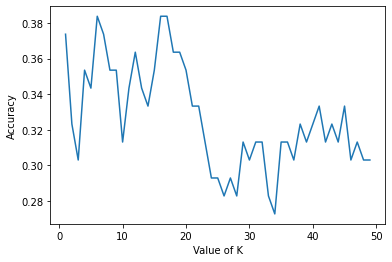

In [10]:
import matplotlib.pyplot as plt
plt.plot(range(1, 50),arr)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")

This is now performing KNN on Porteguese (language) students.

In [11]:
dfp['School'] = list(map(lambda x: 1 if x == 'GP' else 0, dfp['School']))
dfp['Sex'] = list(map(lambda x: 1 if x == 'M' else 0, dfp['Sex']))
dfp['addressType'] = list(map(lambda x: 1 if x == 'U' else 0, dfp['addressType']))
dfp['schoolReason'] = dfp['schoolReason'].map({'course': 0, 'home': 1, 'reputation': 2, 'other': 3})
dfp['Guardian'] = dfp['Guardian'].map({'mother': 0, 'father': 1, 'other': 2})
dfp['schoolSupport'] = list(map(lambda x: 1 if x == 'yes' else 0, dfp['schoolSupport']))
dfp['familySupport'] = list(map(lambda x: 1 if x == 'yes' else 0, dfp['familySupport']))
dfp['extraPaidClasses'] = list(map(lambda x: 1 if x == 'yes' else 0, dfp['extraPaidClasses']))
dfp['extraActivities'] = list(map(lambda x: 1 if x == 'yes' else 0, dfp['extraActivities']))
dfp['pursueHigherEdu'] = list(map(lambda x: 1 if x == 'yes' else 0, dfp['pursueHigherEdu']))
dfp['internetAccess'] = list(map(lambda x: 1 if x == 'yes' else 0, dfp['pursueHigherEdu']))
dfp['inRelationship'] = list(map(lambda x: 1 if x == 'yes' else 0, dfp['pursueHigherEdu']))

In [12]:
x = dfp.values[:, 0:27]
y = dfp.values[:, 27]

p_tr, p_te, tar_tr, tar_te = train_test_split(x, y)

In [13]:
arr = []

for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors = i, algorithm = 'kd_tree')
    knn.fit(p_tr, tar_tr)
    y_p = knn.predict(p_te)
    print(i, accuracy_score(tar_te, y_p))
    arr.append(accuracy_score(tar_te, y_p))

1 0.3006134969325153
2 0.26993865030674846
3 0.25153374233128833
4 0.27607361963190186
5 0.27607361963190186
6 0.31901840490797545
7 0.3067484662576687
8 0.3067484662576687
9 0.34355828220858897
10 0.3312883435582822
11 0.34355828220858897
12 0.34355828220858897
13 0.3496932515337423
14 0.3619631901840491
15 0.37423312883435583
16 0.3619631901840491
17 0.3619631901840491
18 0.3619631901840491
19 0.3803680981595092
20 0.3803680981595092
21 0.3619631901840491
22 0.3619631901840491
23 0.34355828220858897
24 0.3558282208588957
25 0.34355828220858897
26 0.3558282208588957
27 0.34355828220858897
28 0.3496932515337423
29 0.3312883435582822
30 0.3312883435582822
31 0.32515337423312884
32 0.34355828220858897
33 0.3312883435582822
34 0.3312883435582822
35 0.3496932515337423
36 0.32515337423312884
37 0.3128834355828221
38 0.3312883435582822
39 0.32515337423312884
40 0.31901840490797545
41 0.31901840490797545
42 0.3312883435582822
43 0.32515337423312884
44 0.32515337423312884
45 0.3067484662576687

Text(0, 0.5, 'Accuracy')

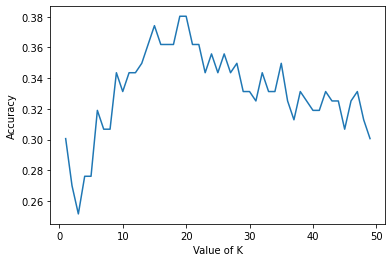

In [14]:
plt.plot(range(1, 50),arr)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")

# Logistic Regression

The following is logistic regression, the first one is on math students and the second is Portuguese students.

In [15]:
model = LogisticRegression(solver='liblinear', random_state=0)

model.fit(xm, ym)
model = LogisticRegression(solver='liblinear', random_state=0).fit(xm, ym)

model.predict(xm)
model.score(xm, ym)

0.5620253164556962

In [16]:
model = LogisticRegression(solver='liblinear', random_state=0)

model.fit(x, y)
model = LogisticRegression(solver='liblinear', random_state=0).fit(x, y)

model.predict(x)
model.score(x, y)

0.43759630200308164

# K Means Clustering

The following is K-Means done on math students and then Portuguese students.

In [17]:
from sklearn.cluster import KMeans

x = df.values[:, 0:28]
y = df.values[:, 27]

# print(y)

p_tr, p_te, tar_tr, tar_te = train_test_split(x, y, test_size = 0.25)

In [18]:
arr = []

for i in range(1, 50):
    n = KMeans(n_clusters = i, init = 'random', n_init = 10)
    n.fit(p_tr, tar_tr)
    y_p = n.predict(p_te)
    print(i, accuracy_score(tar_te, y_p))
    arr.append(accuracy_score(tar_te, y_p))

1 0.1414141414141414
2 0.0
3 0.0
4 0.0
5 0.0
6 0.0
7 0.010101010101010102
8 0.0
9 0.0
10 0.030303030303030304
11 0.030303030303030304
12 0.08080808080808081
13 0.020202020202020204
14 0.020202020202020204
15 0.0707070707070707
16 0.020202020202020204
17 0.050505050505050504
18 0.010101010101010102
19 0.09090909090909091
20 0.050505050505050504
21 0.050505050505050504
22 0.04040404040404041
23 0.09090909090909091
24 0.020202020202020204
25 0.04040404040404041
26 0.020202020202020204
27 0.010101010101010102
28 0.020202020202020204
29 0.030303030303030304
30 0.020202020202020204
31 0.04040404040404041
32 0.020202020202020204
33 0.06060606060606061
34 0.030303030303030304
35 0.0707070707070707
36 0.030303030303030304
37 0.04040404040404041
38 0.010101010101010102
39 0.0
40 0.0707070707070707
41 0.0707070707070707
42 0.0
43 0.010101010101010102
44 0.09090909090909091
45 0.010101010101010102
46 0.010101010101010102
47 0.010101010101010102
48 0.050505050505050504
49 0.020202020202020204


Text(0, 0.5, 'Accuracy')

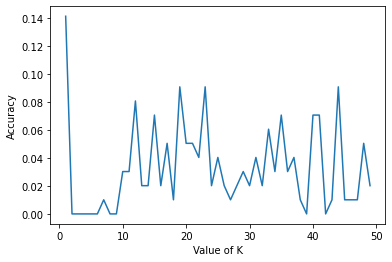

In [19]:
plt.plot(range(1, 50),arr)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")

In [20]:
x = dfp.values[:, 0:28]
y = dfp.values[:, 27]

# print(y)

p_tr, p_te, tar_tr, tar_te = train_test_split(x, y, test_size = 0.25)

In [21]:
arr = []

for i in range(1, 50):
    n = KMeans(n_clusters = i, init = 'random', n_init = 10)
    n.fit(p_tr, tar_tr)
    y_p = n.predict(p_te)
    print(i, accuracy_score(tar_te, y_p))
    arr.append(accuracy_score(tar_te, y_p))

1 0.012269938650306749
2 0.012269938650306749
3 0.012269938650306749
4 0.0
5 0.0
6 0.0
7 0.0
8 0.0
9 0.006134969325153374
10 0.006134969325153374
11 0.06748466257668712
12 0.03067484662576687
13 0.006134969325153374
14 0.07975460122699386
15 0.06748466257668712
16 0.06134969325153374
17 0.012269938650306749
18 0.10429447852760736
19 0.04294478527607362
20 0.018404907975460124
21 0.012269938650306749
22 0.018404907975460124
23 0.05521472392638037
24 0.018404907975460124
25 0.018404907975460124
26 0.06134969325153374
27 0.006134969325153374
28 0.012269938650306749
29 0.03067484662576687
30 0.03680981595092025
31 0.06134969325153374
32 0.04294478527607362
33 0.049079754601226995
34 0.04294478527607362
35 0.05521472392638037
36 0.06134969325153374
37 0.03680981595092025
38 0.024539877300613498
39 0.03067484662576687
40 0.04294478527607362
41 0.03067484662576687
42 0.024539877300613498
43 0.006134969325153374
44 0.03680981595092025
45 0.006134969325153374
46 0.024539877300613498
47 0.0
48 0

Text(0, 0.5, 'Accuracy')

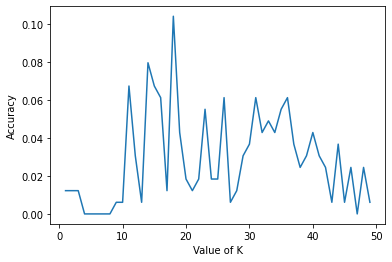

In [22]:
plt.plot(range(1, 50),arr)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")

# Random Forest Classifier

The following is a Random Forest Classifier algorithm done on math students and then Portuguese students.

In [23]:
from sklearn.ensemble import RandomForestClassifier

x = df.values[:, 0:28]
y = df.values[:, 27]

p_tr, p_te, tar_tr, tar_te = train_test_split(x, y, test_size = 0.25)

In [24]:
arr = []

n = RandomForestClassifier()
n.fit(p_tr, tar_tr)
y_p = n.predict(p_te)
print(accuracy_score(tar_te, y_p))
arr.append(accuracy_score(tar_te, y_p))

0.8080808080808081


In [25]:
x = dfp.values[:, 0:28]
y = dfp.values[:, 27]

p_tr, p_te, tar_tr, tar_te = train_test_split(x, y, test_size = 0.25)

In [26]:
arr = []

n = RandomForestClassifier()
n.fit(p_tr, tar_tr)
y_p = n.predict(p_te)
print(accuracy_score(tar_te, y_p))
arr.append(accuracy_score(tar_te, y_p))

0.9141104294478528


# Gradient Boosting

The following is a Gradient Boosting algorithm done on math students and then Portuguese students.

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

x = df.values[:, 0:28]
y = df.values[:, 27]

# print(y)

p_tr, p_te, tar_tr, tar_te = train_test_split(x, y, test_size = 0.33)

In [37]:
arr = []

n = GradientBoostingClassifier()
n.fit(p_tr, tar_tr)
y_p = n.predict(p_te)
print(accuracy_score(tar_te, y_p))
arr.append(accuracy_score(tar_te, y_p))

0.9877300613496932


In [31]:
x = dfp.values[:, 0:28]
y = dfp.values[:, 27]

p_tr, p_te, tar_tr, tar_te = train_test_split(x, y, test_size = 0.25)

In [36]:
arr = []

n = GradientBoostingClassifier()
n.fit(p_tr, tar_tr)
y_p = n.predict(p_te)
print(accuracy_score(tar_te, y_p))
arr.append(accuracy_score(tar_te, y_p))

0.9877300613496932
